4장에서는 Sympy를 미분과 적분을 해보고, Scipy로 미분방정식을 풀어볼 것이다.

## 4.1 Sympy
    

우리는 지금까지 미지수에 값을 다 넣어서 표현했다.

하지만 미지수 그대로 써야하는 경우도 있을 것이다.

이때 Sympy의 Symbol 함수로 미지수를 그대로 쓸 수 있게 해준다.

In [18]:
from sympy import *

t=Symbol('t')
z=5*t**2+2*t+8
print(z)

5*t**2 + 2*t + 8


여기서 미분과 적분도 가능하며 값도 대입할 수 있다. 이는 참으로 놀라운 결과이다!


In [9]:
zprime=Derivative(z, t).doit()
print(zprime)

10*t + 2


zprime은 z를 t로 미분시킨 것이다.

미분한것에 값도 넣을 수 있다. 간단하게 t=1을 대입해보자

In [10]:
print(zprime.subs({t:1}))

12


마찬가지로 적분도 가능하다.

y=k * x로 두고 x로 적분해보자

In [14]:
x=Symbol('x')
k=Symbol('k')

y=k*x
Y=Integral(y,x).doit()
print(Y)

k*x**2/2


적분범위도 지정해 줄 수 있다.

다시 y=k*x를 적분하는데 범위는 0부터 2로 해보자

In [16]:
print(Integral(y,(x,0,2)).doit()) 

2*k


In [22]:
print('(a)=',Integral(cos(x),(x,0,pi/2)).doit())

print('(b)=',Integral(1/x**2,(x,1,3)).doit())


(a)= 1
(b)= 2/3


## 4.2 Scipy

미방을 풀거나 다양하게 쓸 수 있다.

첫번째로 어떤 범위내에서 함수가 0이 되는 값을 찾을때는 brentq를 사용한다.

In [25]:
from scipy.optimize import brentq

x=brentq(sin, 2,4)               

print(x)

3.141592653589793


sin은 2와4사이에서 파이일때 0이 되므로 파이를 출력했다.

두번째로 미분방정식을 풀때 사용할 수 있다.

그러기 위해서는 scipy.integrate에서 odeint를 사용해야한다.

In [26]:
from scipy.integrate import odeint

간단한 예제를 풀면서 알아보자

스프링끝에 추가 달려있다고 가정하자.

이 추의 운동궤적을 그려보자

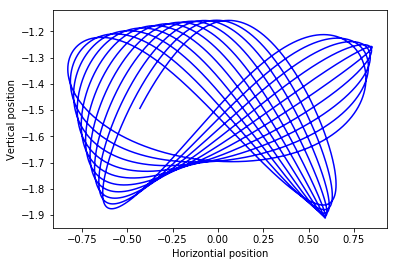

In [31]:
from numpy import *
import matplotlib.pyplot as plt
N=33333                         #number of steps to take

y=zeros([4])

Lo=1.0                          # unstretched spring length
L = 1.0                         # Initial stretch of spring
vo=0.0                          # initial velocity
theta_o=0.3                     # radians
omega_o=0.0                     # initial angular velocity

y[0]=L
y[1]=vo
y[2]=theta_o
y[3]=omega_o

time = linspace(0,25,N)

k=3.5                           # spring constant (Unit: N/m)
m=0.2                           # mass , (Unit: kg)
g=9.8                           # g , (Unit: m/ s ^2)

def spring_pendulum(y, time):
    g0=y[1]
    g1 =(Lo+y[0])*y[3]*y[3]-k/m*y[0]+g*cos(y[2])
    g2=y[3]
    g3=-(g*sin(y[2])+2.0*y[1]*y[3])/(Lo+y[0])
    
    return array([g0,g1,g2,g3])
answer = odeint(spring_pendulum, y, time)

x_data = (Lo+answer[:,0])*sin(answer[:,2])
y_data = -(Lo+answer[:,0])*cos(answer[:,2])

plt.plot(x_data, y_data, 'b')
plt.xlabel('Horizontial position')
plt.ylabel('Vertical position')
plt.show()